In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
full_data = pd.read_csv(r"C:\Users\Edwin\Desktop\OT2-DOE\PlanPrepareProcess\04_07_21_PFO_New_Strategy_Blanked")

# def function identifier
# wavelength_columns = [col for col in full_data.columns if 'nm' in col]
# wavelengths = [float(wavelength.replace("nm","")) for wavelength in wavelength_columns]


sub_blanks= pd.read_csv(r"C:\Users\Edwin\Downloads\03_23_21_Synthesis_Plus_Spectra_Run2")
# sub_blanks= sub_blanks.iloc[::2,:]
sub_blanks.reset_index(drop = True, inplace = True)
wavelength_columns = [col for col in sub_blanks.columns if 'nm' in col]
# wavelength_columns_dotted = [wavelength.replace('.0','') for wavelength in wavelength_columns]
wavelengths = [float(wavelength.replace("nm","")) for wavelength in wavelength_columns]

full_spectra = full_data[wavelength_columns]

,UID,dppc wtf,dspepeg200 wtf,pfh wtf,ethanol wtf,water wtf,Well,Labware,Slot,dppc-ethanol-stock uL,...,950.0nm,955.0nm,960.0nm,965.0nm,970.0nm,975.0nm,980.0nm,985.0nm,990.0nm,995.0nm
0,S6_A1_03-26-2021_Right,0.000075,0.000035,0.000000,0.111,0.889364,A1,Corning 96 Well Plate 360 µL Flat,6,30.000002,...,0.001,0.143,0.159,0.167,0.171,0.174,0.173,0.172,0.170,0.164
1,S6_A2_03-26-2021_Right,0.000075,0.000035,0.000000,0.147,0.852522,A2,Corning 96 Well Plate 360 µL Flat,6,30.000002,...,-0.001,0.138,0.154,0.162,0.166,0.170,0.169,0.169,0.167,0.162
2,S6_A3_03-26-2021_Right,0.000075,0.000035,0.000000,0.184,0.815679,A3,Corning 96 Well Plate 360 µL Flat,6,30.000002,...,-0.002,0.128,0.142,0.150,0.154,0.158,0.158,0.158,0.156,0.152
3,S6_A4_03-26-2021_Right,0.000075,0.000035,0.000000,0.221,0.778837,A4,Corning 96 Well Plate 360 µL Flat,6,30.000002,...,0.000,0.125,0.139,0.147,0.151,0.155,0.155,0.155,0.154,0.150
4,S6_A5_03-26-2021_Right,0.000075,0.000035,0.000000,0.258,0.741995,A5,Corning 96 Well Plate 360 µL Flat,6,30.000002,...,0.000,0.123,0.136,0.144,0.148,0.152,0.152,0.153,0.152,0.148
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,S6_H8_03-26-2021_Right,0.000075,0.000035,0.003333,0.626,0.370241,H8,Corning 96 Well Plate 360 µL Flat,6,30.000002,...,0.024,0.117,0.125,0.131,0.134,0.138,0.138,0.141,0.142,0.140
92,S6_H9_03-26-2021_Right,0.000075,0.000035,0.003333,0.663,0.333399,H9,Corning 96 Well Plate 360 µL Flat,6,30.000002,...,0.023,0.113,0.120,0.125,0.129,0.133,0.133,0.136,0.138,0.136
93,S6_H10_03-26-2021_Right,0.000075,0.000035,0.003333,0.700,0.296557,H10,Corning 96 Well Plate 360 µL Flat,6,30.000002,...,-0.002,0.085,0.092,0.097,0.101,0.105,0.105,0.109,0.111,0.109
94,S6_H11_03-26-2021_Right,0.000075,0.000035,0.003750,0.663,0.332982,H11,Corning 96 Well Plate 360 µL Flat,6,30.000002,...,0.022,0.112,0.119,0.124,0.128,0.132,0.132,0.135,0.136,0.134


In [5]:
samples = full_data[0:96]
samples['ethanol wtf'] = samples['ethanol wtf'].round(3)
samples_spectra = samples[wavelength_columns]

blanks = sub_blanks#full_data[(full_data['pfh wtf']==0) & (full_data['dppc wtf']==0) & (full_data['dspepeg200 wtf']==0)]
blanks['ethanol wtf'] = blanks['ethanol wtf'].round(3)
blanks_spectra = blanks[wavelength_columns]

unique_ethanol_samples = samples['ethanol wtf'].unique()
unique_ethanol_blanks = blanks['ethanol wtf'].unique()

# t = samples[samples['ethanol wtf'] == 0.516]['350.0nm']
# plt.scatter(samples[samples['ethanol wtf'] == 0.516]['pfh wtf'],t)
# plt.xlabel('PFH wtf')
# plt.ylabel('Absorbance at 400nm')
unique_ethanol_blanks, unique_ethanol_samples

(array([0.111, 0.147, 0.184, 0.221, 0.258, 0.295, 0.332, 0.368, 0.405,
        0.442, 0.479, 0.516, 0.553, 0.589, 0.626, 0.663, 0.7  ]),
 array([0.111, 0.147, 0.184, 0.221, 0.258, 0.295, 0.332, 0.368, 0.405,
        0.442, 0.479, 0.516, 0.553, 0.589, 0.626, 0.663, 0.7  ]))

400.0nm


Text(0, 0.5, 'Absorbance at 400nm')

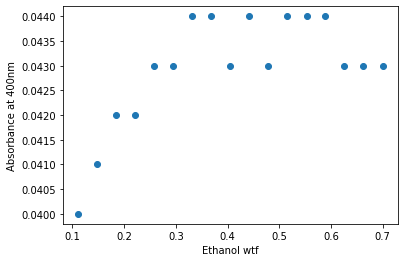

In [12]:
x = []
y = []
for i, row in blanks_spectra.iterrows():
    absorbances = list(row)
    y.append(absorbances[4])
    x.append(i)
#     plt.scatter(i, absorbances[15])
print(wavelength_columns[4])

plt.scatter(blanks['ethanol wtf'],y)
plt.xlabel('Ethanol wtf')
plt.ylabel('Absorbance at 400nm')

In [8]:
# # If just want to look at single blanked samples 
# def plot_blanked(sample_indexes):
#     for sample_index in sample_indexes: 
#         sample_single = samples.loc[sample_index]['ethanol wtf']
#         sample_spec = samples_spectra.loc[sample_index].tolist()

#         blank_single = blanks[blanks['ethanol wtf'].round(3) == samples.loc[sample_index]['ethanol wtf'].round(3)] 
#         blank_spec = blanks_spectra.loc[blank_single.index]

#         blanked_spec = sample_spec - blank_spec
#         plt.plot(wavelengths, blanked_spec[wavelength_columns].iloc[0])

In [9]:
# plot_blanked(samples.index)

In [18]:
blanked_samples = []
for sample_conc, blank_conc in zip(unique_ethanol_samples, unique_ethanol_blanks): #essentially to check enough blank concs exist to cover the samples
    print(sample_conc, blank_conc)
    if sample_conc == blank_conc: # checking to match the thing that is identifying what blank goes with what samples 
        unblanked_full = samples[samples['ethanol wtf']==blank_conc]
        unblanked_spectra = samples_spectra.loc[unblanked_full.index]
        
        blank_full = blanks[blanks['ethanol wtf']==blank_conc]
        blank_spectra = blanks_spectra.loc[blank_full.index]
        
        blanked_spectra = unblanked_spectra - blank_spectra.values
        blanked_samples.append(blanked_spectra)
    else: 
        pass

0.111 0.111
0.184 0.147
0.258 0.184
0.332 0.221
0.405 0.258
0.479 0.295
0.553 0.332
0.626 0.368
0.7 0.405
0.221 0.442
0.295 0.479
0.368 0.516
0.442 0.553
0.516 0.589
0.589 0.626
0.663 0.663


In [ ]:
blanked_samples_spectra = pd.concat(blanked_samples)
blanked_samples = samples.copy() # making a new full one to add the new blanked spectra in
blanked_samples[wavelength_columns] = blanked_samples_spectra


In [ ]:
blanked_samples.to_csv(r'04_08_21_PFH_New_Strategy_Blanked', index=False)

In [11]:
# LOOKING FOR ODD BEHVAIOR
UID_of_interest = []
for i, row in blanked_samples.iterrows():
    UID = row['UID']
    absorbs = row[wavelength_columns]
    absorb_nm = absorbs.loc['600.0nm']
    if absorb_nm < -0.01:
        print(UID)
        UID_of_interest.append(UID)
samples_of_interest = blanked_samples[blanked_samples['UID'].isin(UID_of_interest)]
spectra_of_interest = samples_of_interest[wavelength_columns]

for i, row in spectra_of_interest.iterrows():
    absorbances = list(row) 
    plt.plot(wavelengths, absorbances)
    
samples_of_interest

,UID,dppc wtf,dspepeg200 wtf,pfh wtf,ethanol wtf,water wtf,Well,Labware,Slot,dppc-ethanol-stock uL,...,950.0nm,955.0nm,960.0nm,965.0nm,970.0nm,975.0nm,980.0nm,985.0nm,990.0nm,995.0nm


In [12]:
removed = blanked_samples.copy().drop(samples_of_interest.index)

Text(0, 0.5, 'AU')

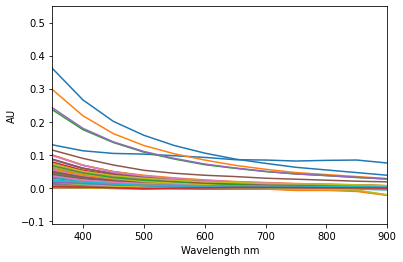

In [14]:
for i, row in blanked_samples[wavelength_columns].iterrows():
    absorbances = list(row) 
    plt.plot(wavelengths, absorbances)
    
plt.xlim(350,900)
plt.xlabel('Wavelength nm')
plt.ylabel('AU')
# plt.ylim(-0.1,0.1)

Text(0, 0.5, 'AU')

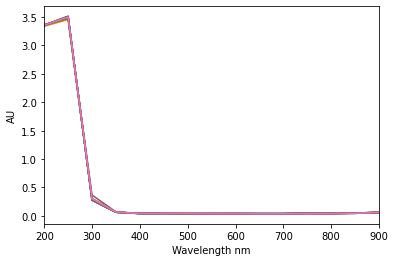

In [18]:
for i, row in blanks_spectra.iterrows():
    absorbances = list(row) 
    plt.plot(wavelengths, absorbances)
plt.xlim(200,900)
plt.xlabel('Wavelength nm')
plt.ylabel('AU')

In [ ]:
for i, row in full_data[0:len(blanked_samples_spectra)][wavelength_columns].iterrows():
    absorbances = list(row) 
    plt.plot(wavelengths, absorbances)
plt.xlim(200, 900)
plt.xlabel('Wavelength nm')
plt.ylabel('AU')